# <center>**LOAN CREDIT RISK PREDICTION💼📊**</center>

---
<h2><center>Author: Bintang Phylosophie</center></h2>


# Dataset & Business Understanding
## Dataset Information
This dataset contains loan information from HOME CREDIT. It's contain data from several cleaned data set that  already perfomed before.

## Attribute Information

### Project Overview
PT Home Credit Indonesia, commonly known as Home Credit, is a multinational company specializing in multipurpose financing. The company offers in-store financing services—non-cash financing provided directly at the point of sale—for consumers purchasing items such as household appliances, electronic devices, mobile phones, and furniture. In addition, Home Credit has developed technology-based financing solutions. Established in Jakarta in 2013, the company now operates at over 19,000 distribution points across 144 cities in Indonesia. As of March 2019, Home Credit has served 3.4 million customers both online and offline.

### Identifier
`SK_ID_CURR` is unique customer ID.

### Target
`TARGET` variable indicates whether the applicant defaulted on their loan (1 for default, 0 for no default)

### Company Goals
The goal to be achieved in this case is to develop a machine learning model capable of accurately predicting whether a customer is likely to default or not, enabling proactive risk management and better-informed lending decisions to reduce default rate through data-driven client assessment using machine learning.

### Problems
A review of customer credit data reveals that 8.6% of customers defaulted, accounting for $68.9 billion in defaulted loan amounts. This represents a disproportionate financial impact from a small portion of the customer base, indicating limitations in current credit risk evaluation methods.
1. Approving loans to applicants who are unlikely to repay their loans resulting in financial losses for the company.
2. Disapproving loans to applicants who are likely to repay the loan resulting in business losses.

### Objectives
1. Analyze and preprocess historical credit and customer data to identify key features influencing default behavior.
2. Build and evaluate multiple classification models to determine the best-performing algorithm.
3. Achieve a balance between precision and recall to minimize false positives (unnecessarily rejecting good customers) and false negatives (missing high-risk defaulters).


# Import Library

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
import plotly.express as px
import toad

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy import stats

# File system manangement
import os

#Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, ADASYN

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance



In [2]:
pd.set_option('display.max_columns', None)

# Membaca file Parquet
train_full = pd.read_parquet('C:/Users/Lenovo/Downloads/PBI/Home Credit/train_full.parquet')
print("shape of the data:", train_full.shape)
train_full.head()

shape of the data: (1430153, 107)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_curr,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,AMT_ANNUITY_curr,AMT_GOODS_PRICE_curr,NAME_TYPE_SUITE_curr,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_curr,HOUR_APPR_PROCESS_START_curr,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MEAN_BUREAU_STATUS,STATUS_BIN,AVG_DAYS_OVERDUE,DEBT_CREDIT_RATIO,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_prev,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_INSTALMENT,AMT_PAYMENT,DIFF_INSTALLMENT_PAYMENT,AVERAGE_DPD,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,865055.565,245781.0,1.108831,moderate_late,0.0,0.284122,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,None,Approved,-606.0,None,None,Unknown,New,Vehicles,POS,None,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,219625.695,219625.695,0.0,0.0,26,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1017400.500,0.0,0.000000,heavy_late,0.0,0.000000,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,None,Approved,-746.0,None,None,Unaccompanied,Repeater,None,Cash,x-sell,Credit and cash offices,-1.0,None,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,1150977.330,1150977.330,0.0,0.0,46,Middle_Age
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1017400.500,0.0,0.000000,heavy_late,0.0,0.000000,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,None,Approved,-828.0

In [3]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430153 entries, 0 to 1430152
Columns: 107 entries, SK_ID_CURR to AGE_GROUP
dtypes: float64(54), int32(1), int64(21), object(31)
memory usage: 1.1+ GB


In [4]:
train_full['TARGET'].value_counts()

TARGET
0    1306813
1     123340
Name: count, dtype: int64

In [3]:
X = train_full.drop(columns='TARGET')
y = train_full[['TARGET']]  

# Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("X_train shape:", X_train.shape, "\nX_test shape:", X_test.shape, "\ny_train shape:", y_train.shape, "\ny_test shape:", y_test.shape)

X_train shape: (1072614, 106) 
X_test shape: (357539, 106) 
y_train shape: (1072614, 1) 
y_test shape: (357539, 1)


# Feature Selection

In [4]:
pd.set_option('display.max_rows', None)
toad.quality(X_train, target=y_train['TARGET'], iv_only=True)

,iv,gini,entropy,unique
EXT_SOURCE_3,3.665517e-01,NaN,NaN,813.0
EXT_SOURCE_2,2.919930e-01,NaN,NaN,116399.0
DAYS_EMPLOYED,1.002460e-01,NaN,NaN,12413.0
AMT_GOODS_PRICE_curr,9.238380e-02,NaN,NaN,976.0
DEBT_CREDIT_RATIO,7.975067e-02,NaN,NaN,173463.0
DAYS_BIRTH,7.769843e-02,NaN,NaN,17450.0
AGE,7.651836e-02,NaN,NaN,49.0
ORGANIZATION_TYPE,7.016200e-02,NaN,NaN,58.0
AGE_GROUP,6.400223e-02,NaN,NaN,4.0
AMT_CREDIT_curr,6.011774e-02,NaN,NaN,5527.0


In [5]:
Xtrain_selected, drop_list = toad.selection.select(
    frame=X_train,
    target=y_train['TARGET'],
    empty=0.5,   # remove columns with more than 50% missing values
    iv=0.02,     # remove columns with IV (Information Value) less than 0.02 (not informative)
    corr=0.7,    # remove columns that have correlation greater than 0.7 with other columns
    return_drop=True
)

print("Selected features:", Xtrain_selected.shape[1])
print("Drop empty (missing >50%):", len(drop_list['empty']))
print("Drop IV (IV < 0.02):", len(drop_list['iv']))
print("Drop corr (corr > 0.7):", len(drop_list['corr']))

print("\nList of dropped features:")
for key, val in drop_list.items():
    print(f"{key}: {val}")

Selected features: 34
Drop empty (missing >50%): 5
Drop IV (IV < 0.02): 56
Drop corr (corr > 0.7): 11

List of dropped features:
empty: ['NAME_CASH_LOAN_PURPOSE' 'CODE_REJECT_REASON' 'NAME_GOODS_CATEGORY'
 'NAME_PRODUCT_TYPE' 'NAME_SELLER_INDUSTRY']
iv: ['SK_ID_CURR' 'NAME_CONTRACT_TYPE_curr' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'NAME_TYPE_SUITE_curr'
 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE' 'FLAG_MOBIL' 'FLAG_WORK_PHONE'
 'FLAG_CONT_MOBILE' 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS'
 'WEEKDAY_APPR_PROCESS_START_curr' 'HOUR_APPR_PROCESS_START_curr'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'EMERGENCYSTATE_MODE'
 'OBS_30_CNT_SOCIAL_CIRCLE' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'OBS_60_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREA

In [6]:
print("\nFinal features used for modeling:")
display(Xtrain_selected.head())


Final features used for modeling:


,CODE_GENDER,AMT_GOODS_PRICE_curr,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_SUM_DEBT,MEAN_BUREAU_STATUS,DEBT_CREDIT_RATIO,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_PAYMENT,AVERAGE_DPD,AGE_GROUP
1016971,M,675000.0,Working,Secondary / secondary special,0.032561,-18346,-186,-4299.0,-1775,Laborers,1,0,Business Entity Type 3,0.686208,0.413597,0.1404,0.9955,0.0837,-1630.0,634275.000,0.000000,0.145853,9000.0,Approved,-1630.0,10.0,high,POS mobile with interest,-1555.0,-1285.0,-1315.0,95423.355,0.0,Middle_Age
513736,M,283500.0,Working,Higher education,0.035792,-15225,-1476,-7759.0,-2177,Managers,2,0,Trade: type 3,0.744670,0.286652,0.1250,0.9767,0.0401,-1840.0,1016154.000,0.893333,0.482493,15709.5,Approved,-2524.0,10.0,low_normal,POS household with interest,-2493.0,-2223.0,-2223.0,168438.195,0.0,Adult
775894,F,675000.0,Pensioner,Secondary / secondary special,0.015221,-20555,365243,-3068.0,-3989,Laborers,2,0,None,0.519498,0.651260,0.1667,0.9752,0.0561,0.0,393529.500,0.000000,0.296467,0.0,Approved,-1112.0,12.0,low_normal,POS household with interest,-1081.0,-751.0,-901.0,154144.620,0.0,Middle_Age
1396010,F,225000.0,Commercial associate,Higher education,0.010500,-10300,-2577,-854.0,-2600,Sales staff,3,0,Self-employed,0.540249,0.746300,0.3750,0.9980,0.1061,-1676.0,0.000,0.000000,0.000000,2250.0,Approved,-1676.0,6.0,high,POS household with interest,-1645.0,-1495.0,-1555.0,27591.660,0.0,Young
43190,M,270000.0,Working,Secondary / secondary special,0.018634,-9879,-1827,-404.0,-2519,Laborers,2,0,Transport: type 2,0.291692,0.032748,0.0833,0.9727,0.0160,-538.0,3729053.925,0.000000,0.690645,0.0,Refused,-74.0,12.0,None,Cash,-831.0,-361.0,-537.0,0.000,NaN,Young


In [7]:
selected_features = Xtrain_selected.columns

X_test = X_test[selected_features]

In [8]:
# output the iv table to a dataframe
def iv_importance(data_selected, label):
    iv_import_feat = toad.quality(data_selected, label, iv_only=True)
    iv_import_feat = iv_import_feat['iv']
    iv_import_feat = iv_import_feat.reset_index()
    iv_import_feat.columns = ['name', 'iv']
    return iv_import_feat

df_iv = iv_importance(Xtrain_selected, y_train['TARGET'])

df_iv.sort_values(by='iv', ascending=False)

,name,iv
0,EXT_SOURCE_3,0.366552
1,EXT_SOURCE_2,0.291993
2,DAYS_EMPLOYED,0.100246
3,AMT_GOODS_PRICE_curr,0.092384
4,DEBT_CREDIT_RATIO,0.079751
5,DAYS_BIRTH,0.077698
6,ORGANIZATION_TYPE,0.070162
7,AGE_GROUP,0.064002
8,NAME_INCOME_TYPE,0.057185
9,DAYS_LAST_PHONE_CHANGE,0.057074


# Handle Outlier

In [9]:
def cap_outliers(data, columns):
    # Create a copy of the data to avoid modifying the original DataFrame
    result = data.copy()

    # Loop over each column in the provided list
    for col in columns:
        # Calculate the first quartile (Q1) for the current column
        Q1 = result[col].quantile(0.25)
        # Calculate the third quartile (Q3) for the current column
        Q3 = result[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR) for the current column
        IQR = Q3 - Q1
        # Calculate the lower bound for the current column
        lower_bound = Q1 - (1.5 * IQR)
        # Calculate the upper bound for the current column
        upper_bound = Q3 + (1.5 * IQR)
        # Replace values in the current column that are less than the lower bound with the lower bound
        result[col] = np.where(result[col] < lower_bound, lower_bound, result[col])
        # Replace values in the current column that are greater than the upper bound with the upper bound
        result[col] = np.where(result[col] > upper_bound, upper_bound, result[col])
    # Return the DataFrame with capped outliers
    return result


# Select the names of all numerical columns in the DataFrame X_train_c2
outliers = Xtrain_selected.select_dtypes(include='number').columns

# Call the cap_outliers function on X_train_c2, passing in the names of the numerical columns
# This will cap the outliers in these columns, and the result is stored in X_train_c3
Xtrain_selected = cap_outliers(Xtrain_selected, outliers)

In [10]:
# combine x_train and y_train
train = pd.concat([Xtrain_selected, y_train], axis=1)
sample = train.sample(frac=0.25, random_state=1103)

c = toad.transform.Combiner()
c.fit(X=sample.drop('TARGET', axis=1), y=sample['TARGET'], method='dt', n_bins=None, empty_separate=True)

In [11]:
bins_output = c.export()

# Transform WoE

In [12]:
# intialize the WOE transformer
td = toad.transform.WOETransformer()

# Transform the data into WoE values
Xtrain_selected_woe = td.fit_transform(c.transform(Xtrain_selected), y_train['TARGET'])

# transform test set
Xtest_selected_woe = td.fit_transform(c.transform(X_test), y_test['TARGET'])

# Calculate the Information Value (IV) for each feature
iv = toad.quality(Xtrain_selected_woe, y_train['TARGET'], iv_only=True)

iv

,iv,gini,entropy,unique
EXT_SOURCE_3,0.361670,NaN,NaN,10.0
EXT_SOURCE_2,0.285767,NaN,NaN,10.0
DAYS_EMPLOYED,0.097063,NaN,NaN,10.0
AMT_GOODS_PRICE_curr,0.091360,NaN,NaN,10.0
DAYS_BIRTH,0.077349,NaN,NaN,10.0
DEBT_CREDIT_RATIO,0.075668,NaN,NaN,10.0
ORGANIZATION_TYPE,0.068100,NaN,NaN,10.0
AGE_GROUP,0.064002,NaN,NaN,4.0
NAME_INCOME_TYPE,0.057192,NaN,NaN,7.0
DAYS_LAST_PHONE_CHANGE,0.054918,NaN,NaN,10.0


In [13]:
Xtrain_selected_woe.head()

,CODE_GENDER,AMT_GOODS_PRICE_curr,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_SUM_DEBT,MEAN_BUREAU_STATUS,DEBT_CREDIT_RATIO,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_PAYMENT,AVERAGE_DPD,AGE_GROUP
1016971,0.244816,0.143507,0.186770,0.092181,-0.344812,-0.061974,0.242673,0.045761,0.216923,-0.019707,0.0,0.0,0.156745,-0.519278,-0.196914,0.0,-0.233055,-0.263463,-0.185359,0.136029,-0.010236,-0.193808,0.00417,-0.138087,-0.220864,-0.209830,0.111131,0.022658,-0.278862,-0.276265,-0.068882,-0.189511,-0.161203,-0.151069
513736,0.244816,0.031328,0.186770,-0.394028,-0.344812,0.045702,0.177872,-0.130981,0.107213,-0.243241,0.0,0.0,0.365611,-0.933029,0.243474,0.0,-0.035234,-0.017126,-0.326621,0.136029,0.213359,0.088421,0.00417,-0.138087,-0.220864,-0.209830,-0.204658,-0.108545,-0.278862,-0.276265,-0.286537,-0.189511,-0.161203,0.144027
775894,-0.138210,0.143507,-0.419565,0.092181,0.022072,-0.257883,-0.415615,0.045761,-0.050187,-0.019707,0.0,0.0,-0.425174,-0.088768,-0.575855,0.0,-0.035234,-0.017126,0.090520,0.136029,-0.010236,-0.193808,0.00417,-0.138087,-0.136753,0.013380,-0.204658,-0.108545,-0.177095,-0.180899,-0.183435,-0.189511,-0.161203,-0.151069
1396010,-0.138210,0.031328,-0.072578,-0.394028,0.022072,0.321716,-0.014071,0.209659,0.107213,0.150247,0.0,0.0,0.198239,-0.088768,-0.997510,0.0,-0.233055,-0.263463,-0.185359,-0.164376,-0.010236,-0.193808,0.00417,-0.138087,-0.220864,-0.198326,0.111131,-0.108545,-0.278862,-0.276265,-0.286537,-0.026253,-0.161203,0.352502
43190,0.244816,0.031328,0.186770,0.092181,0.287483,0.321716,-0.014071,0.209659,0.107213,-0.019707,0.0,0.0,-0.037038,0.345280,1.862279,0.0,-0.035234,-0.017126,0.248645,0.251689,-0.010236,0.357842,0.00417,0.367876,0.026616,0.013380,0.129563,0.105020,0.191481,0.190097,0.191423,0.169799,0.164095,0.352502


# Define Target

In [14]:
y_train = y_train['TARGET']
y_test = y_test['TARGET']

# Machine Learning

In [49]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd
from sklearn.linear_model import LogisticRegression

def eval_model(models, datasets):
    results = []

    for ds_name, (X_train, X_test, y_train, y_test) in datasets.items():
        for model_name, model in models.items():
            # Fit the model
            model.fit(X_train, y_train)

            # Predict and get probabilities
            y_pred_train = model.predict(X_train)
            y_proba_train = model.predict_proba(X_train)[:, 1]

            y_pred_test = model.predict(X_test)
            y_proba_test = model.predict_proba(X_test)[:, 1]

            # Collect metrics
            results.append({
                'model name': f'{model_name} ({ds_name})',

                # Train metrics
                'train recall': round(recall_score(y_train, y_pred_train), 3),
                'train accuracy': round(accuracy_score(y_train, y_pred_train), 3),
                'train precision': round(precision_score(y_train, y_pred_train), 3),
                'train f1 score': round(f1_score(y_train, y_pred_train), 3),
                'train roc auc': round(roc_auc_score(y_train, y_proba_train), 3),

                # Test metrics
                'test recall': round(recall_score(y_test, y_pred_test), 3),
                'test accuracy': round(accuracy_score(y_test, y_pred_test), 3),
                'test precision': round(precision_score(y_test, y_pred_test), 3),
                'test f1 score': round(f1_score(y_test, y_pred_test), 3),
                'test roc auc': round(roc_auc_score(y_test, y_proba_test), 3)
            })

    results_df = pd.DataFrame(results)
    return results_df

# Define your dataset
datasets = {
    'selected_woe': (Xtrain_selected_woe, Xtest_selected_woe, y_train, y_test)
}



## Baseline

### Logistic Regression

In [20]:
# Define your model as a dictionary
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42)
models = {
    'Logistic Regression': lr
}

# Run the evaluation
results_df = eval_model(models, datasets)
display(results_df)


,model name,train recall,train accuracy,train precision,train f1 score,train roc auc,test recall,test accuracy,test precision,test f1 score,test roc auc
0,Logistic Regression (selected_woe),0.672,0.685,0.168,0.269,0.741,0.671,0.687,0.169,0.27,0.742


### LightGBM

In [21]:
from lightgbm import LGBMClassifier
models = {
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}
results_df = eval_model(models, datasets)
display(results_df)


[LightGBM] [Info] Number of positive: 92505, number of negative: 980109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.293307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 1072614, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,model name,train recall,train accuracy,train precision,train f1 score,train roc auc,test recall,test accuracy,test precision,test f1 score,test roc auc
0,LightGBM (selected_woe),0.7,0.704,0.183,0.29,0.774,0.686,0.706,0.182,0.287,0.766


## Hyperparameter Tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameter tuning lightgbm
num_leaves = [int(x) for x in np.linspace(start=20, stop=150, num=10)]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Create the random grid
random_grid = {'num_leaves': num_leaves,
               'max_depth': max_depth}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
lgbm = LGBMClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
lgbm_result = RandomizedSearchCV(estimator=lgbm, param_distributions=random_grid, n_iter=100, cv=3, random_state=42)

# print the best parameters
lgbm_result.fit(Xtrain_selected_woe, y_train)
lgbm_result.best_params_

[LightGBM] [Info] Number of positive: 61670, number of negative: 653406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.516902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 715076, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

{'num_leaves': 150, 'max_depth': 25}

### LightGBM

In [24]:
# assign best hyperparameter to lightgbm
lgbm_tuned = {'LightGBM': LGBMClassifier(random_state=1130, class_weight='balanced', **lgbm_result.best_params_)}
eval_model(lgbm_tuned, datasets)

[LightGBM] [Info] Number of positive: 92505, number of negative: 980109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.205033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 1072614, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,model name,train recall,train accuracy,train precision,train f1 score,train roc auc,test recall,test accuracy,test precision,test f1 score,test roc auc
0,LightGBM (selected_woe),0.772,0.756,0.229,0.353,0.848,0.704,0.752,0.214,0.329,0.81


### Logistic Regression

In [25]:
# logistic regression hyperparameter tuning
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

# Create the random grid
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
lr = LogisticRegression(random_state=42, class_weight='balanced')
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
lr_result = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, n_iter=100, cv=3, random_state=42)

# print the best parameters
lr_result.fit(Xtrain_selected_woe, y_train)
lr_result.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}

In [26]:
lr_tuned = { 'Logistic Regression' : LogisticRegression(random_state=42, class_weight='balanced', **lr_result.best_params_)}
eval_model(lr_tuned, datasets)

,model name,train recall,train accuracy,train precision,train f1 score,train roc auc,test recall,test accuracy,test precision,test f1 score,test roc auc
0,Logistic Regression (selected_woe),0.671,0.685,0.168,0.269,0.741,0.671,0.687,0.169,0.27,0.742


# Evaluation

In [28]:

lgbm_tuned = LGBMClassifier(random_state=1130, class_weight='balanced', **lgbm_result.best_params_)

Xtrain_selected_woe, Xtest_selected_woe, y_train, y_test = datasets['selected_woe']
lgbm_tuned.fit(Xtrain_selected_woe, y_train)
y_pred_test = lgbm_tuned.predict(Xtest_selected_woe)


[LightGBM] [Info] Number of positive: 92505, number of negative: 980109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.337295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 1072614, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [30]:

# Predict probabilities on the test set
y_proba_test = lgbm_tuned.predict_proba(Xtest_selected_woe)[:, 1]

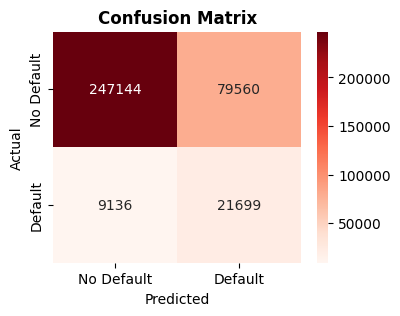

Text(0, 0.5, 'True Positive Rate')

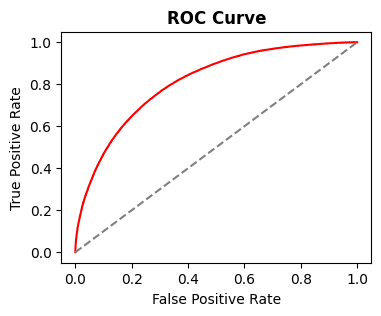

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba_test):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

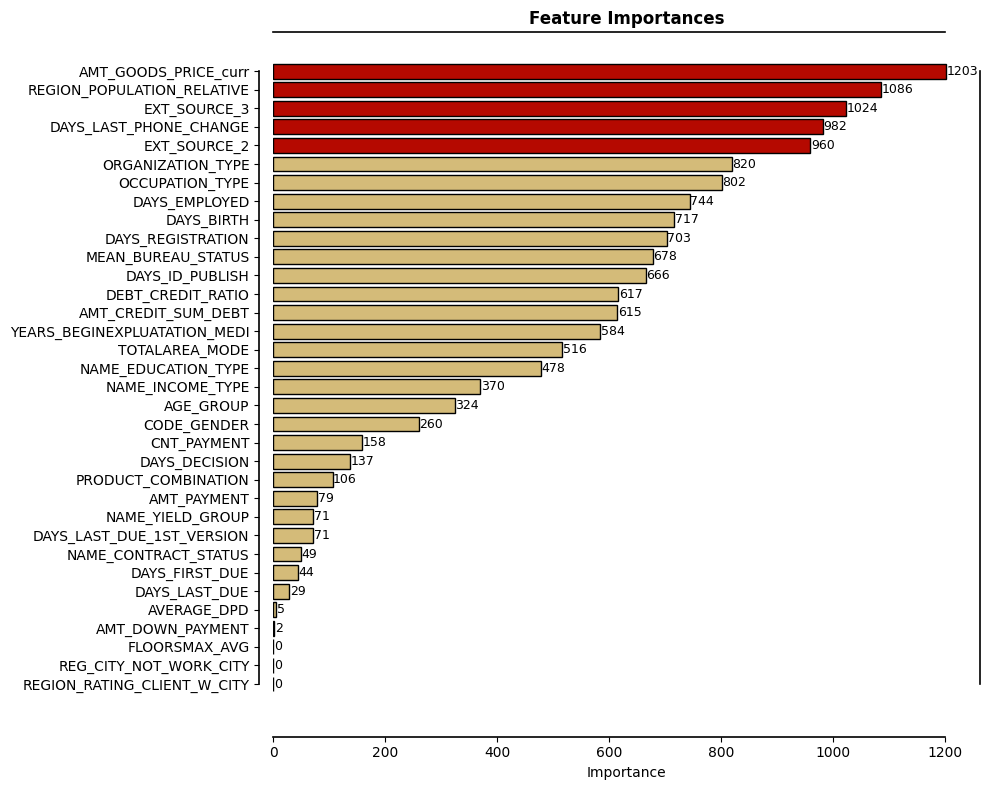

In [43]:

# Get feature importances
importances = lgbm_tuned.feature_importances_

# Create a DataFrame for feature importances
feat_importances = pd.DataFrame({'Feature': Xtrain_selected_woe.columns, 'Importance': importances})

# Sort by importance
feat_importances_sorted = feat_importances.sort_values(by='Importance', ascending=True)

# Define the number of top features you want to highlight
top_features = 5

# Create a color list, where the highest feature importance is highlighted in a different color
threshold = sorted(feat_importances_sorted['Importance'], reverse=True)[top_features - 1]
colors = ['#d4bb79' if x < threshold else '#b50900' for x in feat_importances_sorted['Importance']]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(feat_importances_sorted['Feature'], feat_importances_sorted['Importance'], color=colors, edgecolor='black')

# Add plot border by restoring axis spines
sns.despine(trim=True, offset=10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}', va='center', fontsize=9)

plt.xlabel('Importance')
plt.title('Feature Importances', fontweight = 'bold')
plt.tight_layout()
plt.show()


100%|===================| 357536/357539 [115:36<00:00]        

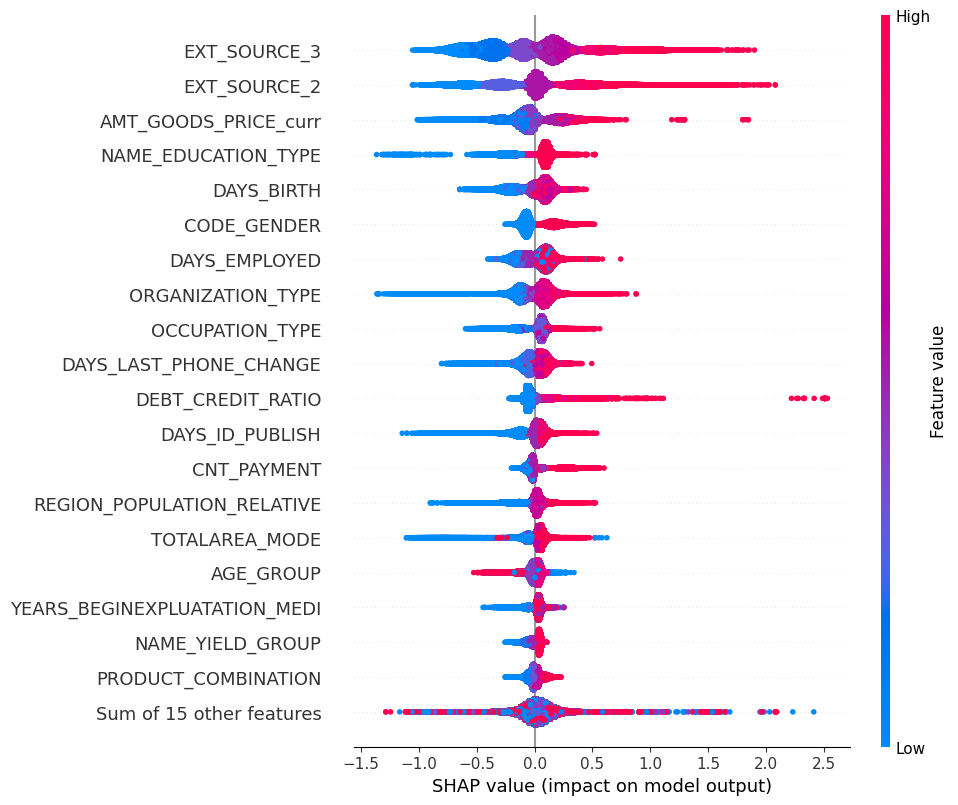

In [44]:
import shap

# Create TreeExplainer
explainer = shap.Explainer(lgbm_tuned, Xtest_selected_woe)

# Calculate SHAP values for test set
shap_values = explainer(Xtest_selected_woe)

# Plot summary of SHAP values (feature importance)
shap.plots.beeswarm(shap_values, max_display=20)


In [37]:
# Create a comparison DataFrame
data_test = Xtest_selected_woe.copy()
data_test['Target'] = y_test  # true label
data_test['prediction'] = y_pred_test  # predicted label
data_test['AMT_CREDIT'] = X['AMT_CREDIT_curr']

# Group by true and predicted labels
comparison = data_test.groupby(['Target', 'prediction']).agg({
    'AMT_CREDIT': 'sum',
    'Target': 'count'
}).rename(columns={'Target': 'count'}).reset_index()

In [39]:
pd.set_option('display.float_format', '{:.6f}'.format)
comparison

,Target,prediction,AMT_CREDIT,count
0,0,0,152029517305.500000,247144
1,0,1,41340323646.000000,79560
2,1,0,5791972531.500000,9136
3,1,1,11476857879.000000,21699
